# Topic Model - TF-IDF (Term Frequency-Inverse Document Frequency)

### https://qiita.com/Spooky_Maskman/items/0d03ea499b88abf56819

### gensimに関する参考：https://qiita.com/u6k/items/5170b8d8e3f41531f08a

## モジュールの設定とデータのインポート

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# NLP
import glob
from tqdm import tqdm
import math
import urllib
import gensim
from gensim import corpora
from collections import defaultdict

# pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

# Vis
from wordcloud import WordCloud
from PIL import Image
import matplotlib
#matplotlib.use('Agg') 
import matplotlib.pylab as plt
#font = {'family': 'TakaoGothic'}
#matplotlib.rc('font', **font)
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import gc
import logging
import pickle
from smart_open import open
print(os.listdir("../data"))

# Any results you write to the current directory are saved as output.

['glove6b50d', 'imagesforkernal', 'sample_submission.csv', 'stopwords-en.txt', 'submission.csv', 'test.csv', 'test_labels.csv', 'train.csv']


In [2]:
# importing the dataset
train=pd.read_csv("../data/train.csv")

# importing stopwords
f = open('../data/stopwords-en.txt',encoding='utf-8_sig') #encoding='utf-8_sig'を追加
stopword = f.read()
f.close()

## 前処理

#### シンボルの除去

In [3]:
# It takes some time.
# setting symbols
symbols = '.,?!-;*"…:—()%#$&_/@＼・ω+=”“[]^–>\\°<~•≠™ˈʊɒ∞§{}·τα❤☺ɡ|¢→̶`❥━┣┫┗Ｏ►★©―ɪ✔®\x96\x92●£♥➤´¹☕≈÷♡◐║▬′ɔː€۩۞†μ✒➥═☆ˌ◄½ʻπδηλσερνʃ✬ＳＵＰＥＲＩＴ☻±♍µº¾✓◾؟．⬅℅»Вав❣⋅¿¬♫ＣＭβ█▓▒░⇒⭐›¡₂₃❧▰▔◞▀▂▃▄▅▆▇↙γ̄″☹➡«φ⅓„✋：¥̲̅́∙‛◇✏▷❓❗¶˚˙）сиʿ✨。ɑ\x80◕！％¯−ﬂﬁ₁²ʌ¼⁴⁄₄⌠♭✘╪▶☭✭♪☔☠♂☃☎✈✌✰❆☙○‣⚓年∎ℒ▪▙☏⅛ｃａｓǀ℮¸ｗ‚∼‖ℳ❄←☼⋆ʒ⊂、⅔¨͡๏⚾⚽Φ×θ￦？（℃⏩☮⚠月✊❌⭕▸■⇌☐☑⚡☄ǫ╭∩╮，例＞ʕɐ̣Δ₀✞┈╱╲▏▕┃╰▊▋╯┳┊≥☒↑☝ɹ✅☛♩☞ＡＪＢ◔◡↓♀⬆̱ℏ\x91⠀ˤ╚↺⇤∏✾◦♬³の｜／∵∴√Ω¤☜▲↳▫‿⬇✧ｏｖｍ－２０８＇‰≤∕ˆ⚜☁\n🍕\r🐵😑\xa0\ue014\t\uf818\uf04a\xad😢🐶️\uf0e0😜😎👊\u200b\u200e😁عدويهصقأناخلىبمغر😍💖💵Е👎😀😂\u202a\u202c🔥😄🏻💥ᴍʏʀᴇɴᴅᴏᴀᴋʜᴜʟᴛᴄᴘʙғᴊᴡɢ😋👏שלוםבי😱‼\x81エンジ故障\u2009🚌ᴵ͞🌟😊😳😧🙀😐😕\u200f👍😮😃😘אעכח💩💯⛽🚄🏼ஜ😖ᴠ🚲‐😟😈💪🙏🎯🌹😇💔😡\x7f👌ἐὶήιὲκἀίῃἴξ🙄Ｈ😠\ufeff\u2028😉😤⛺🙂\u3000تحكسة👮💙فزط😏🍾🎉😞\u2008🏾😅😭👻😥😔😓🏽🎆🍻🍽🎶🌺🤔😪\x08‑🐰🐇🐱🙆😨🙃💕𝘊𝘦𝘳𝘢𝘵𝘰𝘤𝘺𝘴𝘪𝘧𝘮𝘣💗💚地獄谷улкнПоАН🐾🐕😆ה🔗🚽歌舞伎🙈😴🏿🤗🇺🇸мυтѕ⤵🏆🎃😩\u200a🌠🐟💫💰💎эпрд\x95🖐🙅⛲🍰🤐👆🙌\u2002💛🙁👀🙊🙉\u2004ˢᵒʳʸᴼᴷᴺʷᵗʰᵉᵘ\x13🚬🤓\ue602😵άοόςέὸתמדףנרךצט😒͝🆕👅👥👄🔄🔤👉👤👶👲🔛🎓\uf0b7\uf04c\x9f\x10成都😣⏺😌🤑🌏😯ех😲Ἰᾶὁ💞🚓🔔📚🏀👐\u202d💤🍇\ue613小土豆🏡❔⁉\u202f👠》कर्मा🇹🇼🌸蔡英文🌞🎲レクサス😛外国人关系Сб💋💀🎄💜🤢َِьыгя不是\x9c\x9d🗑\u2005💃📣👿༼つ༽😰ḷЗз▱ц￼🤣卖温哥华议会下降你失去所有的钱加拿大坏税骗子🐝ツ🎅\x85🍺آإشء🎵🌎͟ἔ油别克🤡🤥😬🤧й\u2003🚀🤴ʲшчИОРФДЯМюж😝🖑ὐύύ特殊作戦群щ💨圆明园קℐ🏈😺🌍⏏ệ🍔🐮🍁🍆🍑🌮🌯🤦\u200d𝓒𝓲𝓿𝓵안영하세요ЖљКћ🍀😫🤤ῦ我出生在了可以说普通话汉语好极🎼🕺🍸🥂🗽🎇🎊🆘🤠👩🖒🚪天一家⚲\u2006⚭⚆⬭⬯⏖新✀╌🇫🇷🇩🇪🇮🇬🇧😷🇨🇦ХШ🌐\x1f杀鸡给猴看ʁ𝗪𝗵𝗲𝗻𝘆𝗼𝘂𝗿𝗮𝗹𝗶𝘇𝗯𝘁𝗰𝘀𝘅𝗽𝘄𝗱📺ϖ\u2000үսᴦᎥһͺ\u2007հ\u2001ɩｙｅ൦ｌƽｈ𝐓𝐡𝐞𝐫𝐮𝐝𝐚𝐃𝐜𝐩𝐭𝐢𝐨𝐧Ƅᴨןᑯ໐ΤᏧ௦Іᴑ܁𝐬𝐰𝐲𝐛𝐦𝐯𝐑𝐙𝐣𝐇𝐂𝐘𝟎ԜТᗞ౦〔Ꭻ𝐳𝐔𝐱𝟔𝟓𝐅🐋ﬃ💘💓ё𝘥𝘯𝘶💐🌋🌄🌅𝙬𝙖𝙨𝙤𝙣𝙡𝙮𝙘𝙠𝙚𝙙𝙜𝙧𝙥𝙩𝙪𝙗𝙞𝙝𝙛👺🐷ℋ𝐀𝐥𝐪🚶𝙢Ἱ🤘ͦ💸ج패티Ｗ𝙇ᵻ👂👃ɜ🎫\uf0a7БУі🚢🚂ગુજરાતીῆ🏃𝓬𝓻𝓴𝓮𝓽𝓼☘﴾̯﴿₽\ue807𝑻𝒆𝒍𝒕𝒉𝒓𝒖𝒂𝒏𝒅𝒔𝒎𝒗𝒊👽😙\u200cЛ‒🎾👹⎌🏒⛸公寓养宠物吗🏄🐀🚑🤷操美𝒑𝒚𝒐𝑴🤙🐒欢迎来到阿拉斯ספ𝙫🐈𝒌𝙊𝙭𝙆𝙋𝙍𝘼𝙅ﷻ🦄巨收赢得白鬼愤怒要买额ẽ🚗🐳𝟏𝐟𝟖𝟑𝟕𝒄𝟗𝐠𝙄𝙃👇锟斤拷𝗢𝟳𝟱𝟬⦁マルハニチロ株式社⛷한국어ㄸㅓ니͜ʖ𝘿𝙔₵𝒩ℯ𝒾𝓁𝒶𝓉𝓇𝓊𝓃𝓈𝓅ℴ𝒻𝒽𝓀𝓌𝒸𝓎𝙏ζ𝙟𝘃𝗺𝟮𝟭𝟯𝟲👋🦊多伦🐽🎻🎹⛓🏹🍷🦆为和中友谊祝贺与其想象对法如直接问用自己猜本传教士没积唯认识基督徒曾经让相信耶稣复活死怪他但当们聊些政治题时候战胜因圣把全堂结婚孩恐惧且栗谓这样还♾🎸🤕🤒⛑🎁批判检讨🏝🦁🙋😶쥐스탱트뤼도석유가격인상이경제황을렵게만들지않록잘관리해야합다캐나에서대마초와화약금의품런성분갈때는반드시허된사용🔫👁凸ὰ💲🗯𝙈Ἄ𝒇𝒈𝒘𝒃𝑬𝑶𝕾𝖙𝖗𝖆𝖎𝖌𝖍𝖕𝖊𝖔𝖑𝖉𝖓𝖐𝖜𝖞𝖚𝖇𝕿𝖘𝖄𝖛𝖒𝖋𝖂𝕴𝖟𝖈𝕸👑🚿💡知彼百\uf005𝙀𝒛𝑲𝑳𝑾𝒋𝟒😦𝙒𝘾𝘽🏐𝘩𝘨ὼṑ𝑱𝑹𝑫𝑵𝑪🇰🇵👾ᓇᒧᔭᐃᐧᐦᑳᐨᓃᓂᑲᐸᑭᑎᓀᐣ🐄🎈🔨🐎🤞🐸💟🎰🌝🛳点击查版🍭𝑥𝑦𝑧ＮＧ👣\uf020っ🏉ф💭🎥Ξ🐴👨🤳🦍\x0b🍩𝑯𝒒😗𝟐🏂👳🍗🕉🐲چی𝑮𝗕𝗴🍒ꜥⲣⲏ🐑⏰鉄リ事件ї💊「」\uf203\uf09a\uf222\ue608\uf202\uf099\uf469\ue607\uf410\ue600燻製シ虚偽屁理屈Г𝑩𝑰𝒀𝑺🌤𝗳𝗜𝗙𝗦𝗧🍊ὺἈἡχῖΛ⤏🇳𝒙ψՁմեռայինրւդձ冬至ὀ𝒁🔹🤚🍎𝑷🐂💅𝘬𝘱𝘸𝘷𝘐𝘭𝘓𝘖𝘹𝘲𝘫کΒώ💢ΜΟΝΑΕ🇱♲𝝈↴💒⊘Ȼ🚴🖕🖤🥘📍👈➕🚫🎨🌑🐻𝐎𝐍𝐊𝑭🤖🎎😼🕷ｇｒｎｔｉｄｕｆｂｋ𝟰🇴🇭🇻🇲𝗞𝗭𝗘𝗤👼📉🍟🍦🌈🔭《🐊🐍\uf10aლڡ🐦\U0001f92f\U0001f92a🐡💳ἱ🙇𝗸𝗟𝗠𝗷🥜さようなら🔼'

# deleate symbols
def basic_preprocess(data):
    data = str(data)
    data = data.lower()
    '''
    Credit goes to https://www.kaggle.com/gpreda/jigsaw-fast-compact-solution
    '''
    punct =  "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&' + symbols
    def clean_special_chars(text, punct):        
        for p in punct:
            text = text.replace(p, ' ')
        return text

    data = clean_special_chars(data, punct)
    return data

train['cleaned'] = train['comment_text'].apply(basic_preprocess)

#### ストップワードとして定義した単語を除外

In [4]:
#list
all_text = list(train['cleaned'])

# filter stopwords
stop_words = set(stopword.split())
texts = [[word for word in document.lower().split() if word not in stop_words] for document in all_text]

# reduce memory
del train
del all_text
gc.collect()

0

In [5]:
# setting frequency
frequency = defaultdict(int)

# count the number of occurrences of the word
for text in texts:
    for token in text:
        frequency[token] += 1

# build only words above 9 into an array
#texts = [[token for token in text if frequency[token] > 100] for text in texts]
texts = [[token for token in text if frequency[token] > 9] for text in texts] # TF-IDF用
# 頻出回数の閾値を100から9に修正することで、10回以上頻出している単語を残すようにした。

# save texts
with open("texts.pkl",'wb') as f:
    pickle.dump(texts,f)

## 辞書とコーパスの作成

### 文書をベクトルに変換するために、TF-IDF法使用

### Reference: https://skymind.ai/wiki/bagofwords-tf-idf

In [6]:
# make the dictionary
dictionary = corpora.Dictionary(texts)

#dictionary.filter_extremes(no_below=3, no_above=0.8)
dictionary.filter_extremes(no_above=0.8) # TF-IDF用
# no_below の設定を削除することで、上記の分析では除外していた出現文書数が3未満の単語も保持。

# vocab size
print('vocab size: ', len(dictionary))

#save dictionary
dictionary.save_as_text("dictionary.txt")

vocab size:  25051


### 辞書を作成したら、doc2bow() という関数を用いてトークン化された文書をベクトルに変換 --> BoWコーパスをTF-IDFコーパスに変換

In [9]:
# make corpus
corpus = [dictionary.doc2bow(t) for t in texts]

# save corpus
with open("corpus.pkl",'wb') as f:
    pickle.dump(corpus,f)
    
# tfidf
tfidf = gensim.models.TfidfModel(corpus)
tfidf.save('model.tfidf')

# make corpus using TF-IDF
corpus = tfidf[corpus]

# save corpus_tfidf
with open("corpus_tfidf.pkl",'wb') as f:
    pickle.dump(corpus,f)

## トピック数の検討とモデリング

In [10]:
# Metrics for Topic Models
# It takes long time.
start = 2
limit = 22
step = 1

coherence_vals = []
perplexity_vals = []

for n_topic in tqdm(range(start, limit, step)):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topic, random_state=0)
    perplexity_vals.append(np.exp2(-lda_model.log_perplexity(corpus)))
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_vals.append(coherence_model_lda.get_coherence())

100%|██████████| 20/20 [51:06<00:00, 153.33s/it]


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


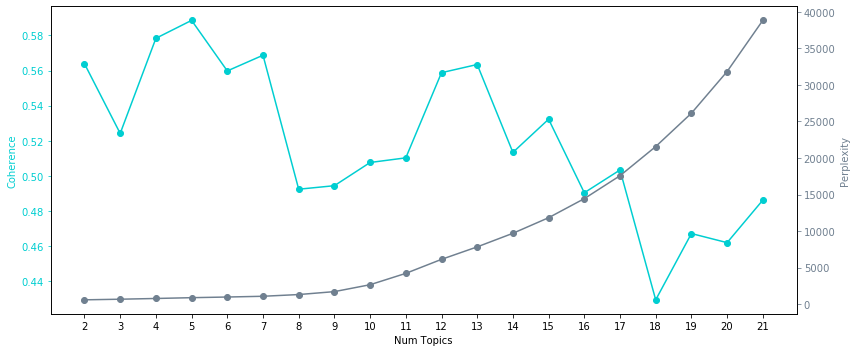

In [11]:
# evaluation
x = range(start, limit, step)

fig, ax1 = plt.subplots(figsize=(12,5))

# coherence
c1 = 'darkturquoise'
ax1.plot(x, coherence_vals, 'o-', color=c1)
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence', color=c1); ax1.tick_params('y', colors=c1)

# perplexity
c2 = 'slategray'
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color=c2)
ax2.set_ylabel('Perplexity', color=c2); ax2.tick_params('y', colors=c2)

# Vis
ax1.set_xticks(x)
fig.tight_layout()

# save as png
plt.savefig('metrics_tfidf.png')

plt.show()

#### Perplexity は低ければ低い程，Coherence は高ければ高い程、良いモデルであると考えられる。従って、トピック数は５に設定。

In [12]:
# LDA Model
# It takes time.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, alpha='symmetric', random_state=0)
# TF-IDF では num_topics を6に設定

# save model
lda_model.save('lda.model')

2019-10-31 15:31:36,974 : INFO : using symmetric alpha at 0.2
2019-10-31 15:31:36,977 : INFO : using symmetric eta at 0.2
2019-10-31 15:31:36,984 : INFO : using serial LDA version on this node
2019-10-31 15:31:37,001 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 159571 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2019-10-31 15:31:37,233 : INFO : PROGRESS: pass 0, at document #2000/159571
2019-10-31 15:31:37,868 : INFO : merging changes from 2000 documents into a model of 159571 documents
2019-10-31 15:31:37,879 : INFO : topic #0 (0.200): 0.008*"talk" + 0.006*"wikipedia" + 0.005*"article" + 0.003*"edit" + 0.003*"content" + 0.003*"remove" + 0.003*"deletion" + 0.002*"references" + 0.002*"continue" + 0.002*"edits"
2019-10-31 15:31:37,882 : INFO : topic #1 (0.200): 0.006*"talk" + 0.005*"wikipedia" + 0.004*"article" + 0.004*"edit" + 

2019-10-31 15:31:41,635 : INFO : topic #3 (0.200): 0.006*"article" + 0.005*"fuck" + 0.004*"talk" + 0.003*"image" + 0.003*"wikipedia" + 0.003*"time" + 0.003*"source" + 0.003*"user" + 0.003*"people" + 0.002*"sources"
2019-10-31 15:31:41,639 : INFO : topic #4 (0.200): 0.005*"barnstar" + 0.005*"article" + 0.003*"image" + 0.003*"wikipedia" + 0.003*"source" + 0.003*"wp" + 0.003*"sources" + 0.003*"talk" + 0.002*"day" + 0.002*"articles"
2019-10-31 15:31:41,643 : INFO : topic diff=0.440421, rho=0.408248
2019-10-31 15:31:41,903 : INFO : PROGRESS: pass 0, at document #14000/159571
2019-10-31 15:31:42,360 : INFO : merging changes from 2000 documents into a model of 159571 documents
2019-10-31 15:31:42,371 : INFO : topic #0 (0.200): 0.007*"blocked" + 0.007*"talk" + 0.006*"article" + 0.006*"wikipedia" + 0.006*"editing" + 0.005*"continue" + 0.005*"vandalize" + 0.005*"edit" + 0.005*"deletion" + 0.003*"speedy"
2019-10-31 15:31:42,376 : INFO : topic #1 (0.200): 0.010*"talk" + 0.007*"wikipedia" + 0.006*"

2019-10-31 15:31:46,672 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.005*"article" + 0.004*"talk" + 0.004*"hope" + 0.004*"question" + 0.004*"style" + 0.003*"sign" + 0.003*"people" + 0.003*"edit" + 0.003*"questions"
2019-10-31 15:31:46,675 : INFO : topic #3 (0.200): 0.005*"fuck" + 0.005*"article" + 0.003*"people" + 0.003*"image" + 0.003*"wikipedia" + 0.003*"talk" + 0.002*"sources" + 0.002*"source" + 0.002*"wp" + 0.002*"time"
2019-10-31 15:31:46,679 : INFO : topic #4 (0.200): 0.006*"image" + 0.005*"barnstar" + 0.004*"article" + 0.004*"source" + 0.003*"wikipedia" + 0.003*"fair" + 0.003*"sources" + 0.003*"support" + 0.003*"talk" + 0.002*"wp"
2019-10-31 15:31:46,683 : INFO : topic diff=0.300704, rho=0.288675
2019-10-31 15:31:46,898 : INFO : PROGRESS: pass 0, at document #26000/159571
2019-10-31 15:31:47,324 : INFO : merging changes from 2000 documents into a model of 159571 documents
2019-10-31 15:31:47,335 : INFO : topic #0 (0.200): 0.008*"article" + 0.008*"blocked" + 0.007*"talk" + 0.

2019-10-31 15:31:50,770 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.005*"article" + 0.004*"style" + 0.004*"talk" + 0.004*"hope" + 0.004*"question" + 0.003*"questions" + 0.003*"sign" + 0.002*"edit" + 0.002*"check"
2019-10-31 15:31:50,773 : INFO : topic #3 (0.200): 0.005*"fuck" + 0.005*"article" + 0.003*"people" + 0.003*"sources" + 0.003*"wikipedia" + 0.003*"time" + 0.002*"source" + 0.002*"talk" + 0.002*"wp" + 0.002*"fucking"
2019-10-31 15:31:50,777 : INFO : topic #4 (0.200): 0.007*"image" + 0.004*"barnstar" + 0.004*"source" + 0.004*"fair" + 0.003*"article" + 0.003*"talk" + 0.003*"redirect" + 0.002*"wp" + 0.002*"wikipedia" + 0.002*"sources"
2019-10-31 15:31:50,792 : INFO : topic diff=0.241009, rho=0.235702
2019-10-31 15:31:50,998 : INFO : PROGRESS: pass 0, at document #38000/159571
2019-10-31 15:31:51,397 : INFO : merging changes from 2000 documents into a model of 159571 documents
2019-10-31 15:31:51,408 : INFO : topic #0 (0.200): 0.009*"article" + 0.008*"deletion" + 0.007*"talk" +

2019-10-31 15:31:55,363 : INFO : topic #1 (0.200): 0.012*"talk" + 0.008*"utc" + 0.007*"wikipedia" + 0.007*"user" + 0.006*"edit" + 0.006*"vandalism" + 0.006*"ip" + 0.005*"reverted" + 0.005*"edits" + 0.004*"sandbox"
2019-10-31 15:31:55,366 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.004*"article" + 0.004*"style" + 0.004*"talk" + 0.004*"hope" + 0.003*"question" + 0.003*"questions" + 0.003*"articles" + 0.003*"sign" + 0.003*"check"
2019-10-31 15:31:55,371 : INFO : topic #3 (0.200): 0.005*"article" + 0.005*"fuck" + 0.003*"people" + 0.003*"sources" + 0.003*"wikipedia" + 0.003*"source" + 0.002*"time" + 0.002*"talk" + 0.002*"fucking" + 0.002*"opinion"
2019-10-31 15:31:55,375 : INFO : topic #4 (0.200): 0.009*"image" + 0.004*"fair" + 0.004*"source" + 0.004*"article" + 0.003*"barnstar" + 0.003*"talk" + 0.003*"jpg" + 0.003*"media" + 0.003*"redirect" + 0.002*"images"
2019-10-31 15:31:55,379 : INFO : topic diff=0.194765, rho=0.204124
2019-10-31 15:31:55,588 : INFO : PROGRESS: pass 0, at document

2019-10-31 15:31:59,883 : INFO : topic #0 (0.200): 0.010*"article" + 0.008*"deletion" + 0.008*"blocked" + 0.008*"wikipedia" + 0.008*"talk" + 0.007*"editing" + 0.007*"continue" + 0.006*"vandalize" + 0.006*"edit" + 0.005*"deleted"
2019-10-31 15:31:59,886 : INFO : topic #1 (0.200): 0.012*"talk" + 0.009*"utc" + 0.007*"wikipedia" + 0.007*"user" + 0.007*"edit" + 0.006*"vandalism" + 0.006*"ip" + 0.005*"reverted" + 0.005*"block" + 0.005*"edits"
2019-10-31 15:31:59,890 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.004*"talk" + 0.004*"article" + 0.004*"style" + 0.004*"hope" + 0.003*"question" + 0.003*"questions" + 0.003*"sign" + 0.003*"english" + 0.003*"articles"
2019-10-31 15:31:59,894 : INFO : topic #3 (0.200): 0.005*"article" + 0.004*"fuck" + 0.004*"people" + 0.003*"sources" + 0.003*"time" + 0.002*"wikipedia" + 0.002*"source" + 0.002*"talk" + 0.002*"fucking" + 0.002*"wp"
2019-10-31 15:31:59,898 : INFO : topic #4 (0.200): 0.011*"image" + 0.005*"fair" + 0.004*"media" + 0.004*"jpg" + 0.003*"s

2019-10-31 15:32:03,788 : INFO : topic #0 (0.200): 0.010*"article" + 0.009*"wikipedia" + 0.009*"deletion" + 0.008*"talk" + 0.008*"blocked" + 0.008*"editing" + 0.007*"continue" + 0.006*"vandalize" + 0.006*"edit" + 0.005*"speedy"
2019-10-31 15:32:03,792 : INFO : topic #1 (0.200): 0.012*"talk" + 0.009*"utc" + 0.007*"user" + 0.007*"wikipedia" + 0.006*"edit" + 0.006*"ip" + 0.006*"vandalism" + 0.005*"reverted" + 0.005*"block" + 0.004*"edits"
2019-10-31 15:32:03,795 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.005*"article" + 0.004*"talk" + 0.004*"style" + 0.004*"hope" + 0.003*"english" + 0.003*"question" + 0.003*"sign" + 0.003*"articles" + 0.003*"questions"
2019-10-31 15:32:03,802 : INFO : topic #3 (0.200): 0.005*"article" + 0.004*"fuck" + 0.004*"people" + 0.003*"sources" + 0.003*"source" + 0.003*"time" + 0.002*"fucking" + 0.002*"wikipedia" + 0.002*"talk" + 0.002*"wp"
2019-10-31 15:32:03,806 : INFO : topic #4 (0.200): 0.013*"image" + 0.005*"fair" + 0.005*"jpg" + 0.004*"media" + 0.004*"fi

2019-10-31 15:32:08,299 : INFO : topic #0 (0.200): 0.010*"article" + 0.009*"wikipedia" + 0.009*"deletion" + 0.008*"talk" + 0.008*"blocked" + 0.007*"editing" + 0.007*"continue" + 0.006*"edit" + 0.005*"vandalize" + 0.005*"speedy"
2019-10-31 15:32:08,301 : INFO : topic #1 (0.200): 0.012*"talk" + 0.009*"utc" + 0.007*"user" + 0.007*"wikipedia" + 0.007*"vandalism" + 0.006*"edit" + 0.006*"ip" + 0.005*"reverted" + 0.005*"block" + 0.005*"sandbox"
2019-10-31 15:32:08,306 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.005*"article" + 0.004*"talk" + 0.004*"hope" + 0.004*"english" + 0.004*"question" + 0.004*"style" + 0.003*"sign" + 0.003*"questions" + 0.003*"redirect"
2019-10-31 15:32:08,310 : INFO : topic #3 (0.200): 0.005*"article" + 0.004*"fuck" + 0.004*"people" + 0.003*"sources" + 0.003*"source" + 0.003*"time" + 0.002*"fucking" + 0.002*"wikipedia" + 0.002*"talk" + 0.002*"wp"
2019-10-31 15:32:08,316 : INFO : topic #4 (0.200): 0.013*"image" + 0.005*"jpg" + 0.005*"fair" + 0.004*"file" + 0.004*"m

2019-10-31 15:32:12,643 : INFO : topic #0 (0.200): 0.010*"article" + 0.009*"wikipedia" + 0.009*"deletion" + 0.008*"talk" + 0.008*"blocked" + 0.007*"editing" + 0.007*"continue" + 0.006*"edit" + 0.005*"vandalize" + 0.005*"deleted"
2019-10-31 15:32:12,647 : INFO : topic #1 (0.200): 0.012*"talk" + 0.009*"utc" + 0.008*"user" + 0.007*"wikipedia" + 0.007*"vandalism" + 0.006*"edit" + 0.006*"ip" + 0.005*"reverted" + 0.005*"block" + 0.005*"edits"
2019-10-31 15:32:12,651 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.005*"talk" + 0.005*"article" + 0.004*"style" + 0.004*"hope" + 0.004*"question" + 0.003*"sign" + 0.003*"english" + 0.003*"questions" + 0.003*"check"
2019-10-31 15:32:12,655 : INFO : topic #3 (0.200): 0.006*"article" + 0.004*"people" + 0.003*"fuck" + 0.003*"sources" + 0.003*"source" + 0.003*"time" + 0.002*"fucking" + 0.002*"wikipedia" + 0.002*"talk" + 0.002*"wp"
2019-10-31 15:32:12,660 : INFO : topic #4 (0.200): 0.013*"image" + 0.005*"jpg" + 0.005*"fair" + 0.004*"file" + 0.004*"copyr

2019-10-31 15:32:17,805 : INFO : topic #0 (0.200): 0.011*"article" + 0.009*"wikipedia" + 0.009*"deletion" + 0.008*"blocked" + 0.008*"talk" + 0.007*"editing" + 0.007*"continue" + 0.006*"edit" + 0.006*"vandalize" + 0.005*"tag"
2019-10-31 15:32:17,808 : INFO : topic #1 (0.200): 0.013*"talk" + 0.009*"utc" + 0.008*"user" + 0.007*"wikipedia" + 0.007*"vandalism" + 0.007*"ip" + 0.006*"edit" + 0.006*"block" + 0.005*"edits" + 0.005*"sandbox"
2019-10-31 15:32:17,811 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.005*"talk" + 0.004*"article" + 0.004*"style" + 0.004*"hope" + 0.004*"question" + 0.004*"english" + 0.003*"sign" + 0.003*"questions" + 0.003*"language"
2019-10-31 15:32:17,814 : INFO : topic #3 (0.200): 0.005*"article" + 0.004*"people" + 0.003*"fuck" + 0.003*"sources" + 0.003*"source" + 0.003*"time" + 0.002*"fucking" + 0.002*"wikipedia" + 0.002*"talk" + 0.002*"wp"
2019-10-31 15:32:17,817 : INFO : topic #4 (0.200): 0.013*"image" + 0.005*"jpg" + 0.005*"file" + 0.005*"fair" + 0.004*"copyrig

2019-10-31 15:32:22,082 : INFO : topic #0 (0.200): 0.011*"article" + 0.009*"wikipedia" + 0.009*"deletion" + 0.008*"talk" + 0.008*"blocked" + 0.007*"editing" + 0.006*"continue" + 0.006*"edit" + 0.005*"deleted" + 0.005*"vandalize"
2019-10-31 15:32:22,085 : INFO : topic #1 (0.200): 0.013*"talk" + 0.010*"utc" + 0.008*"user" + 0.007*"vandalism" + 0.007*"wikipedia" + 0.006*"ip" + 0.006*"edit" + 0.005*"block" + 0.005*"edits" + 0.005*"sandbox"
2019-10-31 15:32:22,089 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.004*"talk" + 0.004*"hope" + 0.004*"article" + 0.004*"style" + 0.004*"english" + 0.004*"question" + 0.003*"questions" + 0.003*"sign" + 0.003*"language"
2019-10-31 15:32:22,092 : INFO : topic #3 (0.200): 0.006*"article" + 0.004*"people" + 0.004*"fuck" + 0.003*"sources" + 0.003*"source" + 0.003*"time" + 0.002*"talk" + 0.002*"wikipedia" + 0.002*"fucking" + 0.002*"wp"
2019-10-31 15:32:22,096 : INFO : topic #4 (0.200): 0.014*"image" + 0.005*"jpg" + 0.005*"fair" + 0.005*"copyright" + 0.004

2019-10-31 15:32:25,663 : INFO : topic #0 (0.200): 0.011*"article" + 0.009*"deletion" + 0.009*"wikipedia" + 0.009*"talk" + 0.008*"blocked" + 0.007*"editing" + 0.006*"continue" + 0.006*"edit" + 0.006*"deleted" + 0.005*"vandalize"
2019-10-31 15:32:25,667 : INFO : topic #1 (0.200): 0.013*"talk" + 0.009*"utc" + 0.008*"user" + 0.007*"wikipedia" + 0.007*"vandalism" + 0.007*"ip" + 0.006*"edit" + 0.005*"block" + 0.005*"sandbox" + 0.005*"reverted"
2019-10-31 15:32:25,671 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.005*"talk" + 0.005*"hope" + 0.004*"article" + 0.004*"style" + 0.004*"question" + 0.004*"english" + 0.003*"sign" + 0.003*"questions" + 0.003*"check"
2019-10-31 15:32:25,673 : INFO : topic #3 (0.200): 0.006*"article" + 0.004*"people" + 0.004*"fuck" + 0.003*"sources" + 0.003*"source" + 0.003*"time" + 0.002*"wrong" + 0.002*"talk" + 0.002*"wikipedia" + 0.002*"wp"
2019-10-31 15:32:25,677 : INFO : topic #4 (0.200): 0.015*"image" + 0.006*"jpg" + 0.005*"file" + 0.005*"fair" + 0.005*"copyr

2019-10-31 15:32:29,610 : INFO : merging changes from 2000 documents into a model of 159571 documents
2019-10-31 15:32:29,621 : INFO : topic #0 (0.200): 0.011*"article" + 0.010*"deletion" + 0.009*"wikipedia" + 0.008*"talk" + 0.008*"blocked" + 0.007*"editing" + 0.007*"continue" + 0.007*"edit" + 0.006*"deleted" + 0.006*"vandalize"
2019-10-31 15:32:29,625 : INFO : topic #1 (0.200): 0.013*"talk" + 0.009*"utc" + 0.008*"user" + 0.008*"wikipedia" + 0.007*"vandalism" + 0.006*"ip" + 0.006*"edit" + 0.006*"reverted" + 0.006*"sandbox" + 0.005*"block"
2019-10-31 15:32:29,629 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.005*"talk" + 0.004*"hope" + 0.004*"article" + 0.004*"style" + 0.004*"question" + 0.004*"english" + 0.003*"sign" + 0.003*"questions" + 0.003*"enjoy"
2019-10-31 15:32:29,632 : INFO : topic #3 (0.200): 0.006*"article" + 0.004*"people" + 0.004*"fuck" + 0.003*"sources" + 0.003*"source" + 0.003*"time" + 0.002*"wikipedia" + 0.002*"fucking" + 0.002*"talk" + 0.002*"agree"
2019-10-31 15:32

2019-10-31 15:32:33,155 : INFO : topic #0 (0.200): 0.011*"article" + 0.009*"deletion" + 0.009*"wikipedia" + 0.008*"talk" + 0.008*"blocked" + 0.007*"editing" + 0.007*"edit" + 0.006*"continue" + 0.006*"deleted" + 0.006*"wp"
2019-10-31 15:32:33,158 : INFO : topic #1 (0.200): 0.013*"talk" + 0.009*"utc" + 0.008*"user" + 0.008*"wikipedia" + 0.007*"vandalism" + 0.006*"ip" + 0.006*"edit" + 0.005*"block" + 0.005*"reverted" + 0.005*"sandbox"
2019-10-31 15:32:33,161 : INFO : topic #2 (0.200): 0.005*"wikipedia" + 0.005*"talk" + 0.004*"hope" + 0.004*"style" + 0.004*"article" + 0.004*"question" + 0.004*"english" + 0.003*"questions" + 0.003*"sign" + 0.003*"write"
2019-10-31 15:32:33,165 : INFO : topic #3 (0.200): 0.006*"article" + 0.004*"people" + 0.003*"fuck" + 0.003*"sources" + 0.003*"source" + 0.003*"time" + 0.002*"wikipedia" + 0.002*"wp" + 0.002*"talk" + 0.002*"agree"
2019-10-31 15:32:33,168 : INFO : topic #4 (0.200): 0.015*"image" + 0.006*"fair" + 0.005*"jpg" + 0.005*"file" + 0.004*"copyright" +

## モデルの評価

In [13]:
# importing the dataset
test=pd.read_csv("../data/test.csv")

# list
all_text = list(test['comment_text'])

# filter stopwords
test_texts = [[word for word in document.lower().split() if word not in stop_words] for document in all_text]

# make test_corpus
test_corpus = [dictionary.doc2bow(t) for t in test_texts]

# reduce memory
del test
del all_text
gc.collect()

# test
N = sum(count for doc in test_corpus for id, count in doc)
print("N: ",N)

perplexity = np.exp2(-lda_model.log_perplexity(test_corpus))
print("perplexity:", perplexity)

N:  2182888


2019-10-31 15:34:20,498 : INFO : -8.736 per-word bound, 426.5 perplexity estimate based on a held-out corpus of 153164 documents with 2182888 words


perplexity: 426.49438989334124


#### 出現単語数が約220万であるのに対して、Perplexity は426と非常に小さな値を取っているので、良いモデルであることが確認できた。

## 可視化

### Word Cloud

2019-10-31 15:34:53,020 : WARNING : findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


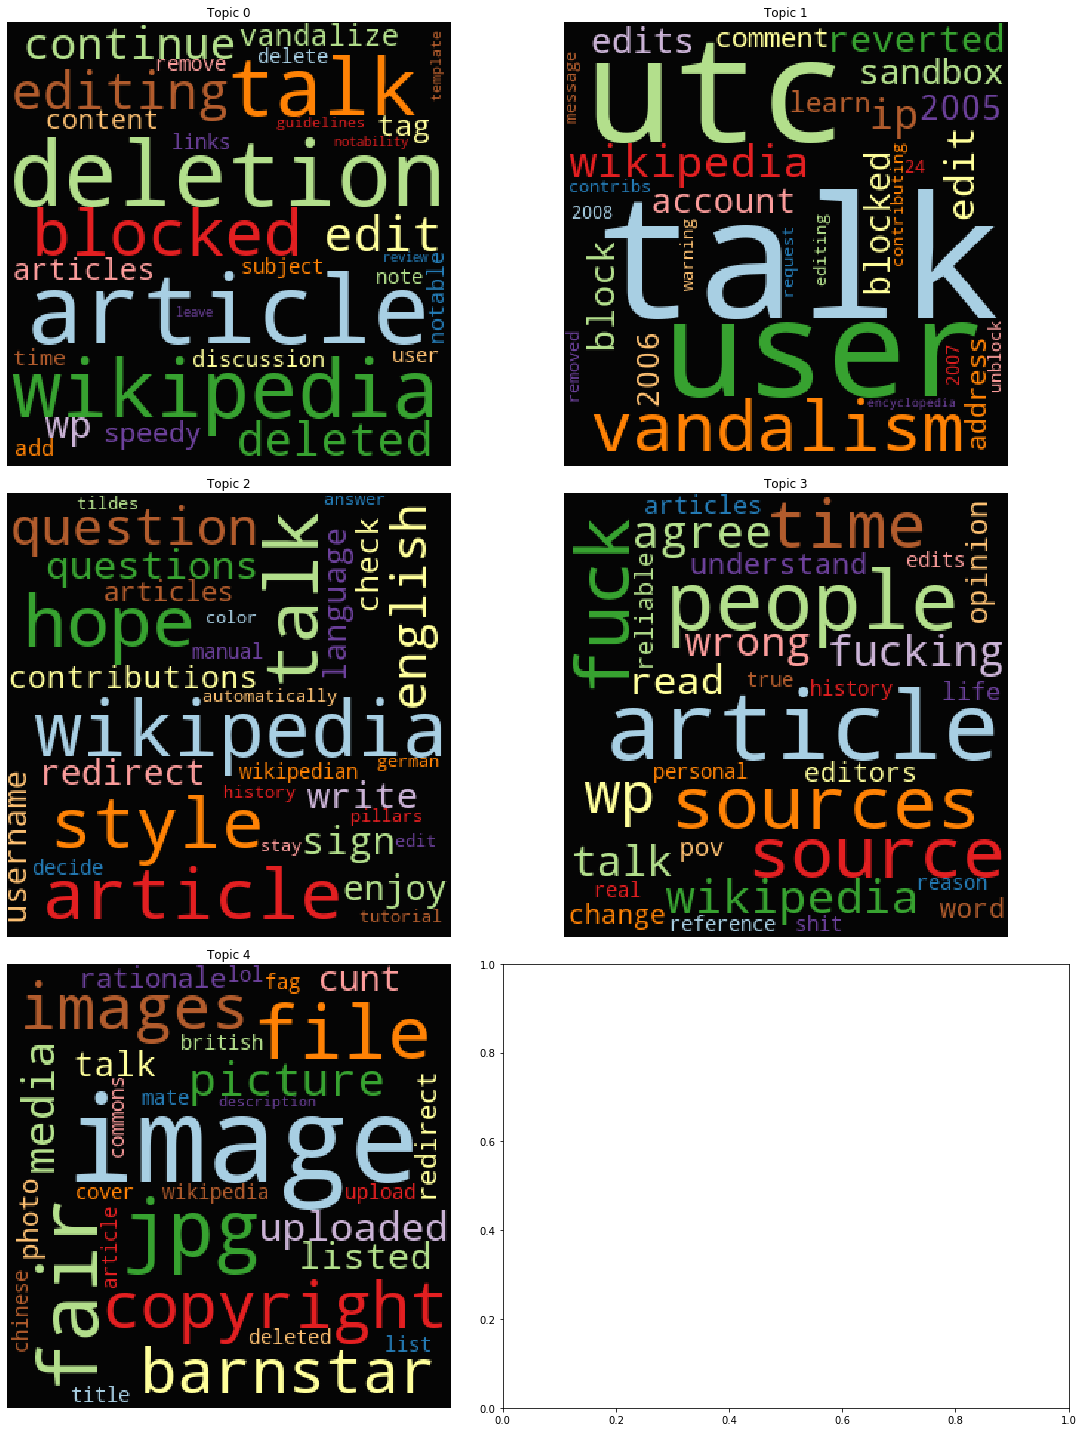

In [14]:
# WordCloud
fig, axs = plt.subplots(ncols=2, nrows=math.ceil(lda_model.num_topics/2), figsize=(16,20))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda_model.num_topics)):

    x = dict(lda_model.show_topic(t, 30))
    im = WordCloud(
        background_color='black',
        color_func=color_func,
        max_words=4000,
        width=300, height=300,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))

# vis
plt.tight_layout()

# save as png
plt.savefig('wordcloud_tfidf.png') 

plt.show()

### pyLDAvis

In [15]:
pyLDAvis.enable_notebook()

### PCoA（Principal Coordinate Analysis）

In [16]:
# Vis PCoA
vis_pcoa = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
vis_pcoa

2019-10-31 15:36:40,626 : INFO : NumExpr defaulting to 8 threads.
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.128132  0.025896       1        1  17.994413
1      0.202271  0.077156       2        1  16.838539
2     -0.128499 -0.261775       3        1  16.697424
3      0.056986 -0.036313       4        1  35.554398
4     -0.258889  0.195036       5        1  12.915228, topic_info=     Category         Freq       Term        Total  loglift  logprob
143   Default  1063.000000      image  1063.000000  30.0000  30.0000
33    Default   854.000000        utc   854.000000  29.0000  29.0000
133   Default  1022.000000   deletion  1022.000000  28.0000  28.0000
2302  Default  1180.000000    blocked  1180.000000  27.0000  27.0000
16    Default  2928.000000       talk  2928.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
151    Topic5   145.309494       list   733.527832   0.4278  -6.1550
16     Topic5   172.207108       talk  2928.652344  -0.7868  -5.9851
132    Topic5   141.977798    deleted   909.205200   0.1899  -6.1782
71     Topic5   156.025818  wikipedia  2470.296631  -0.7153  -6.0838
48     Topic5   123.421295    article  2743.550293  -1.0546  -6.3182

[386 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
7764      2  0.992882     00
416       2  0.996045     01
579       2  0.989406     04
1288      2  0.989910     06
2484      2  0.993709     08
...     ...       ...    ...
400       5  0.039446  wrong
310       1  0.656263   yeah
310       2  0.204007   yeah
310       3  0.019663   yeah
310       5  0.117980   yeah

[824 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [17]:
# save as html
pyLDAvis.save_html(vis_pcoa, 'pyldavis_output_pcoa_tfidf.html')

### MMDS（Metric Multi-dimensional Scaling）

In [18]:
# Vis Metric MDS
vis_mds = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds='mmds', sort_topics=False)
vis_mds

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.248769  0.004341       1        1  17.994919
1      0.126588  0.275222       2        1  16.837984
2     -0.268711 -0.137315       3        1  16.698391
3     -0.176714  0.174793       4        1  35.553745
4      0.070069 -0.317042       5        1  12.914960, topic_info=     Category         Freq       Term        Total  loglift  logprob
143   Default  1063.000000      image  1063.000000  30.0000  30.0000
33    Default   854.000000        utc   854.000000  29.0000  29.0000
133   Default  1022.000000   deletion  1022.000000  28.0000  28.0000
2302  Default  1180.000000    blocked  1180.000000  27.0000  27.0000
16    Default  2928.000000       talk  2928.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
151    Topic5   145.306183       list   733.527466   0.4278  -6.1550
16     Topic5   172.203186       talk  2928.644287  -0.7868  -5.9851
132    Topic5   141.974548    deleted   909.214355   0.1899  -6.1782
71     Topic5   156.022263  wikipedia  2470.307373  -0.7153  -6.0838
48     Topic5   123.418480    article  2743.567383  -1.0546  -6.3182

[386 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
7764      2  0.992917     00
416       2  0.996080     01
579       2  0.989440     04
1288      2  0.989944     06
2484      2  0.993743     08
...     ...       ...    ...
400       5  0.039447  wrong
310       1  0.656258   yeah
310       2  0.204005   yeah
310       3  0.019663   yeah
310       5  0.117979   yeah

[824 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [19]:
# save as html
pyLDAvis.save_html(vis_mds, 'pyldavis_output_mds_tfidf.html')

### t-SNE（t-distributed Stochastic Neighbor Embedding）

In [20]:
# Vis t-SNE
vis_tsne = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds='tsne', sort_topics=False)
vis_tsne

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      103.438736  111.161873       1        1  17.995903
1      143.695892 -124.346039       2        1  16.838289
2      196.989960    9.071132       3        1  16.699453
3      -34.079784   69.571434       4        1  35.552830
4       21.973385  -57.485046       5        1  12.913527, topic_info=     Category         Freq       Term        Total  loglift  logprob
143   Default  1063.000000      image  1063.000000  30.0000  30.0000
33    Default   854.000000        utc   854.000000  29.0000  29.0000
133   Default  1022.000000   deletion  1022.000000  28.0000  28.0000
2302  Default  1180.000000    blocked  1180.000000  27.0000  27.0000
16    Default  2928.000000       talk  2928.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
151    Topic5   145.290329       list   733.523499   0.4278  -6.1550
16     Topic5   172.184387       talk  2928.711670  -0.7869  -5.9851
132    Topic5   141.959061    deleted   909.233337   0.1898  -6.1782
71     Topic5   156.005234  wikipedia  2470.369385  -0.7153  -6.0838
48     Topic5   123.405014    article  2743.614014  -1.0547  -6.3182

[386 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
7764      2  0.992897     00
416       2  0.996060     01
579       2  0.989421     04
1288      2  0.989924     06
2484      2  0.993723     08
...     ...       ...    ...
400       5  0.039447  wrong
310       1  0.656238   yeah
310       2  0.203999   yeah
310       3  0.019663   yeah
310       5  0.117975   yeah

[824 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [21]:
# save as html
pyLDAvis.save_html(vis_tsne, 'pyldavis_output_tsne_tfidf.html')